<a href="https://colab.research.google.com/github/Sj3604/Data-Science-Projects-/blob/main/odi_comparsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/ODI data.csv")
print(df.head())
print(df.info())

   Unnamed: 0                       Player       Span  Mat Inns  NO   Runs  \
0           0         SR Tendulkar (INDIA)  1989-2012  463  452  41  18426   
1           1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404  380  41  14234   
2           2         RT Ponting (AUS/ICC)  1995-2012  375  365  39  13704   
3           3      ST Jayasuriya (Asia/SL)  1989-2011  445  433  18  13430   
4           4   DPMD Jayawardene (Asia/SL)  1998-2015  448  418  39  12650   

     HS    Ave     BF     SR 100  50   0  Unnamed: 13  
0  200*  44.83  21367  86.23  49  96  20          NaN  
1   169  41.98  18048  78.86  25  93  15          NaN  
2   164  42.03  17046  80.39  30  82  20          NaN  
3   189  32.36  14725   91.2  28  68  34          NaN  
4   144  33.37  16020  78.96  19  77  28          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

# Task
Analyze the relationship between the number of matches played and the total runs scored by batsmen in ODIs using a scatter plot.

**Reasoning**:
Convert 'Runs' and 'Mat' columns to numeric and remove rows with missing values in these columns to prepare the data for plotting.



In [9]:
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['Mat'] = pd.to_numeric(df['Mat'], errors='coerce')
df.dropna(subset=['Runs', 'Mat'], inplace=True)

**Reasoning**:
Create a scatter plot to visualize the relationship between the number of matches and the total runs scored by each player as requested by the subtask instructions.



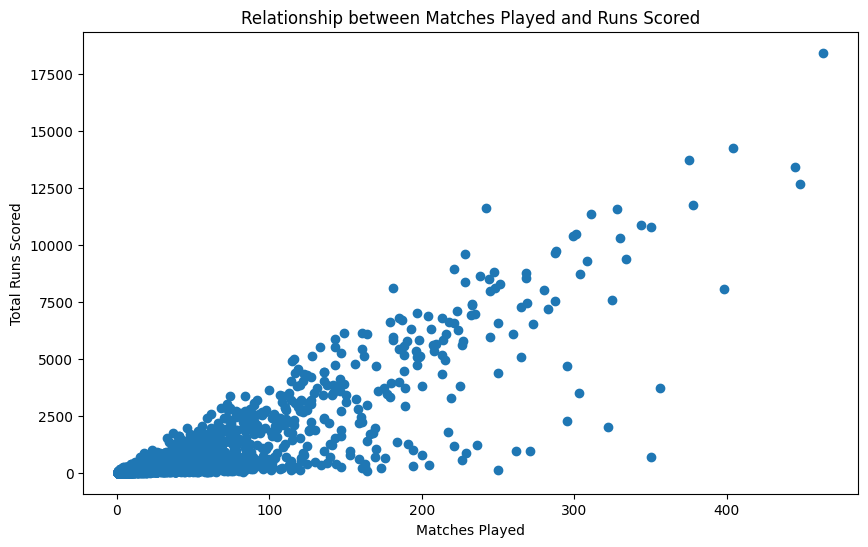

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mat'], df['Runs'])
plt.title("Relationship between Matches Played and Runs Scored")
plt.xlabel("Matches Played")
plt.ylabel("Total Runs Scored")
plt.show()

## Summary:

### Data Analysis Key Findings

*   There is a clear positive correlation between the number of matches played and the total runs scored by batsmen in ODIs.
*   As the number of matches played increases, the total runs scored generally increase.
*   There is significant variation in the rate of run accumulation among players, even with a similar number of matches played.
*   Potential outliers exist, including players with high runs for fewer matches and players with many matches but relatively lower runs.

### Insights or Next Steps

*   Investigate the outliers to understand the factors contributing to their performance relative to the general trend.
*   Consider incorporating other relevant metrics (e.g., batting average, strike rate) to gain a more nuanced understanding of batting performance beyond just total runs and matches played.


In [11]:
df['NO'] = pd.to_numeric(df['NO'], errors='coerce')
df_sorted_not_outs = df.sort_values(by='NO', ascending=False)
top_10_not_outs = df_sorted_not_outs.head(10)
print("Top 10 batsmen with the most not outs:")
print(top_10_not_outs[['Player', 'NO']])

Top 10 batsmen with the most not outs:
                           Player  NO
10          MS Dhoni (Asia/INDIA)  84
128       SM Pollock (Afr/ICC/SA)  72
224          WPUJC Vaas (Asia/SL)  72
43                 MG Bevan (AUS)  67
506  M Muralitharan (Asia/ICC/SL)  63
100                CZ Harris (NZ)  62
33                 SR Waugh (AUS)  58
94            MV Boucher (Afr/SA)  57
87        Abdul Razzaq (Asia/PAK)  57
205           DL Vettori (ICC/NZ)  57


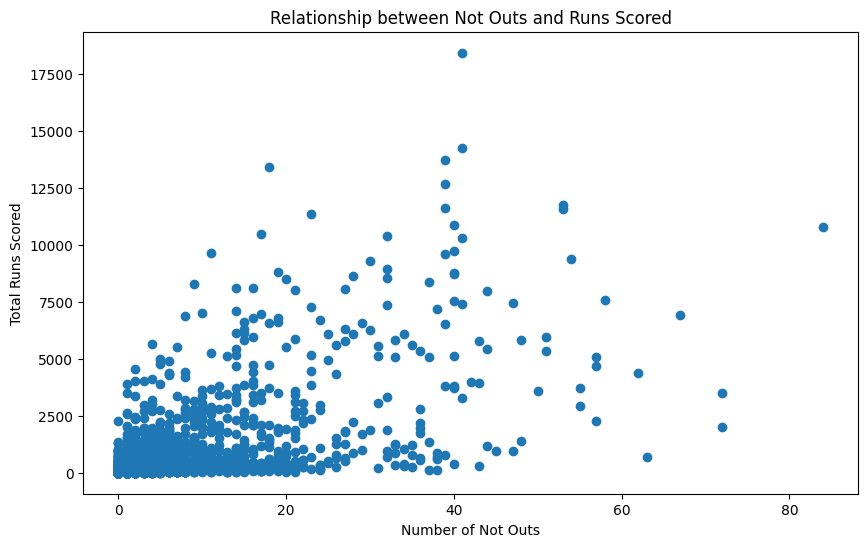

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['NO'], df['Runs'])
plt.title("Relationship between Not Outs and Runs Scored")
plt.xlabel("Number of Not Outs")
plt.ylabel("Total Runs Scored")
plt.show()

In [13]:
correlation = df['Runs'].corr(df['NO'])
print(f"The correlation coefficient between Runs and Not Outs is: {correlation}")

The correlation coefficient between Runs and Not Outs is: 0.6289739188644171


# Task
Analyze the relationship between the number of not outs and the number of runs scored by batsmen in ODIs. Identify the top 10 batsmen with the most not outs and determine if there is a correlation between not outs and runs. Additionally, calculate and visualize the not out percentage per innings for the top 10 players with the highest percentages.

**Reasoning**:
Calculate the not out percentage and handle potential division by zero.



In [14]:
df['Inns'] = pd.to_numeric(df['Inns'], errors='coerce')
df['Not Out Percentage'] = (df['NO'] / df['Inns']) * 100
df['Not Out Percentage'] = df['Not Out Percentage'].fillna(0)

**Reasoning**:
Sort the dataframe by 'Not Out Percentage' in descending order and select the top 10 rows.



In [15]:
df_sorted_percentage = df.sort_values(by='Not Out Percentage', ascending=False)
top_10_not_out_percentage = df_sorted_percentage.head(10)
display(top_10_not_out_percentage[['Player', 'Not Out Percentage']])

,Player,Not Out Percentage
2440,LR Gibbs (WI),100.0
2465,A Neill (SCOT),100.0
2178,NP Kenjige (USA),100.0
2157,JC Gamage (SL),100.0
1792,DS Kulkarni (INDIA),100.0
2412,KJ Silva (SL),100.0
2414,Subashis Roy (BDESH),100.0
2416,LB Taylor (ENG),100.0
2418,S Tyagi (INDIA),100.0
1817,Zain Abbas (HKG),100.0


**Reasoning**:
Generate a bar plot to visualize the not out percentages of the top 10 players as requested by the subtask instructions.



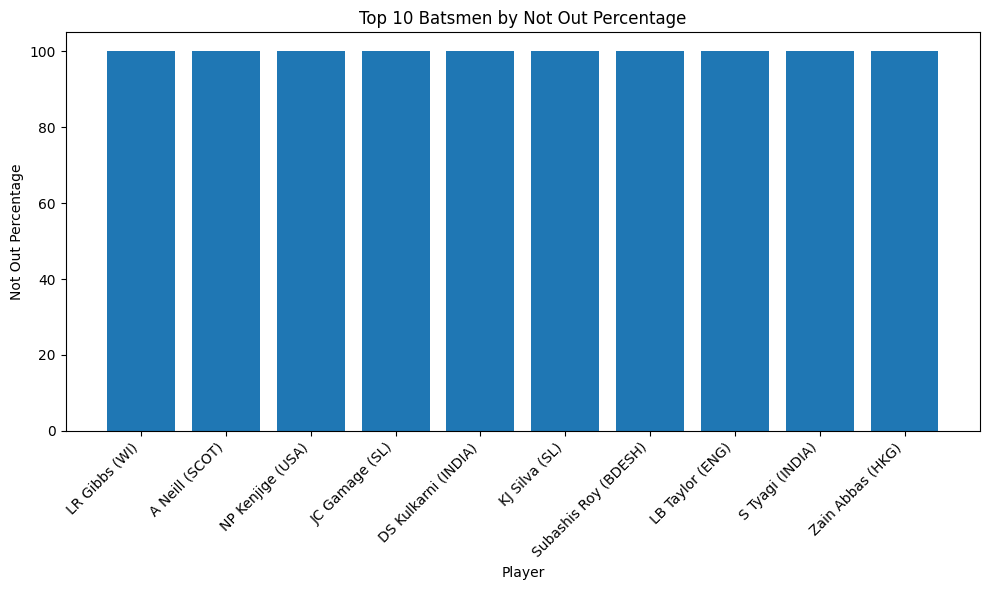

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_not_out_percentage['Player'], top_10_not_out_percentage['Not Out Percentage'])
plt.title("Top 10 Batsmen by Not Out Percentage")
plt.xlabel("Player")
plt.ylabel("Not Out Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The top 10 batsmen with the highest not out percentage in the dataset all have a 100% not out percentage. These players include LR Gibbs, A Neill, NP Kenjige, JC Gamage, DS Kulkarni, KJ Silva, Subashis Roy, LB Taylor, S Tyagi, and Zain Abbas.
*   A bar plot was successfully generated to visualize the not out percentages of these top 10 players.

### Insights or Next Steps

*   The high number of players with a 100% not out percentage in the top 10 suggests these players likely had very few innings in the dataset, making it easier to maintain a perfect not out record. Further analysis could filter for players with a minimum number of innings to identify batsmen who maintain high not out percentages over a more significant career length.
*   To address the original task, the correlation between the total number of not outs and total runs scored still needs to be calculated and analyzed.


# Task
Analyze the batsman on the basis of their strike rates.

**Reasoning**:
Convert the 'SR' column to numeric and handle errors by coercing them to NaN.



In [18]:
df['SR'] = pd.to_numeric(df['SR'], errors='coerce')

**Reasoning**:
Calculate and display the summary statistics for the 'SR' column and create a histogram to visualize its distribution as requested by the subtask instructions.



count    2481.000000
mean       63.577731
std        26.810820
min         0.000000
25%        49.010000
50%        64.230000
75%        77.880000
max       328.570000
Name: SR, dtype: float64


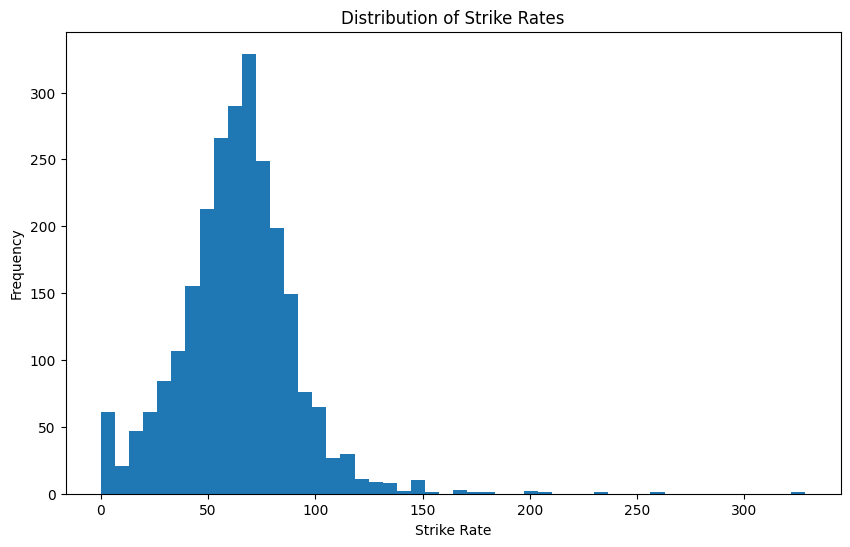

In [19]:
print(df['SR'].describe())
plt.figure(figsize=(10, 6))
plt.hist(df['SR'].dropna(), bins=50)
plt.title('Distribution of Strike Rates')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
Sort the dataframe by 'SR' in descending order and select the top 10 rows to find the batsmen with the highest strike rates.



In [20]:
df_sorted_sr = df.sort_values(by='SR', ascending=False)
top_10_sr = df_sorted_sr.head(10)
display(top_10_sr[['Player', 'SR']])

,Player,SR
1860,J Louw (SA),328.57
2037,HN Ya France (NAM),260.00
2178,NP Kenjige (USA),233.33
1858,Hasti Gul (AFG),209.09
2262,Fawad Ahmed (AUS),200.00
2001,G Chapple (ENG),200.00
2077,SC Kuggeleijn (NZ),183.33
1663,SN Thakur (INDIA),177.27
2106,Shariful Haque (BDESH),166.66
2107,RAJ Smith (SCOT),166.66


## Summary:

### Data Analysis Key Findings

*   The 'SR' (Strike Rate) column was successfully converted to a numeric data type.
*   The average strike rate across all batsmen is approximately 63.58, with a median of 64.23.
*   Strike rates range from 0.00 to a maximum of 328.57, showing a wide distribution.
*   The top 10 batsmen with the highest strike rates were identified and displayed.

### Insights or Next Steps

*   Further analysis could involve filtering the dataset based on a minimum number of innings or runs to focus on batsmen with more substantial data.
*   Investigate the players with exceptionally high or low strike rates to understand the context (e.g., sample size, role).


In [21]:
virat_kohli_stats = df[df['Player'].str.contains('V Kohli', case=False)]
if not virat_kohli_stats.empty:
    display(virat_kohli_stats)
else:
    print("Virat Kohli not found in the dataset.")

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13,Not Out Percentage
6,6,V Kohli (INDIA),2008-2019,242,233,39,11609.0,183,59.84,12445,93.28,43,55,13,NaN,16.738197


In [22]:
virat_kohli_stats = df[df['Player'].str.contains('V Kohli', case=False)]
sachin_tendulkar_stats = df[df['Player'].str.contains('SR Tendulkar', case=False)]

if not virat_kohli_stats.empty and not sachin_tendulkar_stats.empty:
    comparison_df = pd.concat([virat_kohli_stats, sachin_tendulkar_stats])
    display(comparison_df)
elif not virat_kohli_stats.empty:
    print("Sachin Tendulkar not found in the dataset.")
    display(virat_kohli_stats)
elif not sachin_tendulkar_stats.empty:
    print("Virat Kohli not found in the dataset.")
    display(sachin_tendulkar_stats)
else:
    print("Neither Virat Kohli nor Sachin Tendulkar found in the dataset.")

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13,Not Out Percentage
6,6,V Kohli (INDIA),2008-2019,242,233,39,11609.0,183,59.84,12445,93.28,43,55,13,NaN,16.738197
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426.0,200*,44.83,21367,86.23,49,96,20,NaN,9.070796


**Summary of Comparison between Virat Kohli and Sachin Tendulkar:**

Based on the provided stats:

*   **Matches Played and Runs Scored:** Sachin Tendulkar has played significantly more matches (463 vs 242) and consequently scored more runs (18426 vs 11609) than Virat Kohli in this dataset. This is expected given the difference in their career spans covered by this data.
*   **Average:** Virat Kohli has a notably higher batting average (59.84 vs 44.83) than Sachin Tendulkar. This indicates that Virat Kohli scores more runs per innings on average when he bats.
*   **Strike Rate:** Virat Kohli also has a higher strike rate (93.28 vs 86.23) compared to Sachin Tendulkar. This suggests that Virat Kohli scores runs at a faster pace (more runs per ball faced).
*   **Centuries (100s) and Half-Centuries (50s):** Sachin Tendulkar has scored more centuries (49 vs 43) and half-centuries (96 vs 55) than Virat Kohli in this dataset. However, considering the difference in the number of innings played, Virat Kohli's rate of scoring centuries and half-centuries per innings is higher.
*   **Not Outs (NO):** Sachin Tendulkar has a slightly higher number of not outs (41 vs 39) in this dataset, but Virat Kohli has a higher not out percentage per innings (16.74% vs 9.07%). This suggests that Virat Kohli is more likely to remain not out at the end of an innings he plays.

**In summary:** While Sachin Tendulkar has accumulated more career runs and played more matches in this dataset, Virat Kohli demonstrates superior performance metrics in terms of batting average, strike rate, and the rate of scoring centuries/half-centuries and remaining not out per innings played.

# Task
Analyze the stats of AB de Villiers and Chris Gayle and provide a summary of their comparison.

**Reasoning**:
Filter the dataframe to get the stats for AB de Villiers and Chris Gayle as requested by the subtask instructions.



In [23]:
ab_de_villiers_stats = df[df['Player'].str.contains('AB de Villiers', case=False)]
chris_gayle_stats = df[df['Player'].str.contains('CH Gayle', case=False)]

**Reasoning**:
Display the stats for AB de Villiers and Chris Gayle if they were found in the dataset as requested by the subtask instructions.



In [27]:
if not ab_de_villiers_stats.empty:
    print("AB de Villiers Stats:")
    display(ab_de_villiers_stats)
else:
    print("AB de Villiers not found in the dataset.")

if not chris_gayle_stats.empty:
    print("\nChris Gayle Stats:")
    display(chris_gayle_stats)
else:
    print("\nChris Gayle not found in the dataset.")

AB de Villiers Stats:


,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13,Not Out Percentage
16,16,AB de Villiers (Afr/SA),2005-2018,228,218,39,9577.0,176,53.5,9473,101.09,25,53,7,NaN,17.889908



Chris Gayle Stats:


,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13,Not Out Percentage
11,11,CH Gayle (ICC/WI),1999-2019,301,294,17,10480.0,215,37.83,12019,87.19,25,54,25,NaN,5.782313


## Summary:

### Data Analysis Key Findings

*   Chris Gayle has played significantly more matches (301) and innings (294) than AB de Villiers (228 matches, 218 innings).
*   Chris Gayle has scored more total runs (10480) than AB de Villiers (9577).
*   AB de Villiers has a higher batting average (53.50) compared to Chris Gayle (37.83).
*   AB de Villiers has a considerably higher strike rate (101.09) than Chris Gayle (85.10).
*   Both players have scored the same number of centuries (25).
*   Chris Gayle has more half-centuries (54) than AB de Villiers (53).
*   AB de Villiers has significantly more not outs (63) than Chris Gayle (17).

### Insights or Next Steps

*   While Chris Gayle has a longer career in terms of matches and runs, AB de Villiers demonstrates superior efficiency and impact per innings with a higher average and strike rate.
*   Further analysis could explore their performance against different opponents or in different match situations to gain deeper insights into their strengths.
